## `Linear` Regression will work as `single layer`  NN.

In [70]:
import torch
import torch.nn as nn
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
from sklearn.datasets import make_regression 

In [38]:
df = make_regression( n_samples = 2000, n_features = 10, n_informative = 8, n_targets = 1, random_state = 123)

In [39]:
df[0]

array([[-1.46430365,  0.83434309,  0.78323336, ...,  0.02339083,
        -0.64059315,  0.5019276 ],
       [ 1.06610427, -0.88228741,  0.3666786 , ..., -0.53130523,
        -0.79652841,  0.71211583],
       [-0.79624606, -0.70613644, -0.45496319, ..., -0.50598312,
        -0.79663015, -0.53181232],
       ...,
       [ 0.0479694 , -0.90002479, -0.50162825, ...,  2.3056804 ,
         1.39530594,  0.13062108],
       [ 1.28589063, -1.09870752, -1.70515222, ...,  1.0022698 ,
         1.70273529,  0.35369488],
       [-0.46358317, -1.31841143, -0.89540659, ...,  0.53473693,
        -1.32686991, -0.22753403]])

### In the above data frame df[0] & df[1] are the input values and the lables.

In [40]:
df[0]

array([[-1.46430365,  0.83434309,  0.78323336, ...,  0.02339083,
        -0.64059315,  0.5019276 ],
       [ 1.06610427, -0.88228741,  0.3666786 , ..., -0.53130523,
        -0.79652841,  0.71211583],
       [-0.79624606, -0.70613644, -0.45496319, ..., -0.50598312,
        -0.79663015, -0.53181232],
       ...,
       [ 0.0479694 , -0.90002479, -0.50162825, ...,  2.3056804 ,
         1.39530594,  0.13062108],
       [ 1.28589063, -1.09870752, -1.70515222, ...,  1.0022698 ,
         1.70273529,  0.35369488],
       [-0.46358317, -1.31841143, -0.89540659, ...,  0.53473693,
        -1.32686991, -0.22753403]])

In [45]:
df[1]

array([ 172.53691983,  215.21121552, -158.98289059, ...,   34.83439164,
         55.95314496, -290.58068989])

In [42]:
df_d = pd.DataFrame(df[0])
df_d

,0,1,2,3,4,5,6,7,8,9
0,-1.464304,0.834343,0.783233,1.620294,1.051837,1.359688,0.990387,0.023391,-0.640593,0.501928
1,1.066104,-0.882287,0.366679,0.691810,1.440743,-1.109329,1.426170,-0.531305,-0.796528,0.712116
2,-0.796246,-0.706136,-0.454963,-0.889072,0.265999,2.214242,-0.714103,-0.505983,-0.796630,-0.531812
3,0.052521,0.937710,-1.219606,0.183837,0.335267,0.926475,0.457570,-2.120475,0.412166,0.483326
4,-0.932933,1.436673,-1.419069,0.923696,-0.106441,1.506170,-0.971641,-3.040497,1.272624,1.012440
...,...,...,...,...,...,...,...,...,...,...
1995,0.545908,2.119462,-0.806582,-1.029152,-0.146403,0.672919,-0.443816,-0.518905,-0.221915,0.023623
1996,-0.202461,0.095117,-0.737995,-0.225763,0.268916,-0.368158,-0.790039,1.231454,-1.366324,1.577189
1997,0.047969,-0.900025,-0.501628,0.551160,-0.760390,-0.578815,-0.302958,2.305680,1.395306,0.130621
1998,1.285891,-1.098708,-1.705152,0.954331,0.384872,-0.934160,-1.163658,1.002270,1.702735,0.353695


In [44]:
type(df[0])

numpy.ndarray

### Convert data from numpy nd array to a tensor.

### As you can see that df[1], df[0] was the arrays and now X, Y are the tensors., [..., None] way to change the size as required [2000,1]

In [90]:
X = torch.from_numpy(df[0]).float()
Y = torch.from_numpy(df[1])[..., None].float()

In [91]:
Y.shape

torch.Size([2000, 1])

### Now we will define our linear layer that will work as regression model.

In [92]:
layer1 = nn.Linear(10,1)

### Loss function

In [93]:
loss_fn = nn.MSELoss()

### Optimizer defining 

In [94]:
optimizer = torch.optim.SGD(layer1.parameters(), lr = 0.001)

In [95]:
num_epochs = 10000
all_losses = []
output = layer1(X)

for epoch in range(num_epochs):
    output = layer1(X)
    loss = loss_fn(output, Y)
    all_losses.append(loss.detach().numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


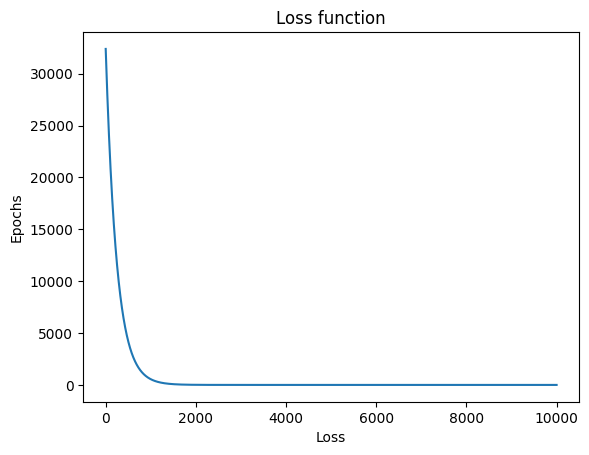

array(1.6859587e-05, dtype=float32)

In [103]:
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.title("Loss function")
plt.plot(all_losses)

plt.show()
all_losses[-1]